# Statistical Programming with Python
# Assignment 1 - Titanic Missing Values
## Master in Business Analytics and Big Data, 2018-2019
### Student: Chia-Yu Lin chiayu.lin@student.ie.edu

***

### Part I: Exploratory analysis (2 points)

**1. Read the dataset correctly using pandas, using an appropriate column as index (1 point)**

In [2]:
# Import package pandas
import pandas as pd
import numpy as np

In [3]:
# Read the dataset
titanic = pd.read_csv(
    "train.csv",
    sep=",",
    index_col="PassengerId",  # assign PassengerId as index.
)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Verify if the set index is unique
titanic.index.is_unique

True

**2. Compute the percentage of survivors and the percentage of men and women (0.5 points)**

In [4]:
# Check if there are NAs in the columns used for computation.
# Here "Survived" and "Sex" need to be checked.
titanic[["Survived", "Sex"]].isna().sum()

Survived    0
Sex         0
dtype: int64

In [5]:
# Compute the percentage of survivors
survivors_pct = round(
    ((len(titanic.loc[titanic["Survived"] == 1]) / len(titanic)) * 100), 2
)

print("The percentage of survivors: ", survivors_pct, "%")

# Compute the percentage of male and female
male_pct = round(((len(titanic.loc[titanic["Sex"] == "male"]) / len(titanic)) * 100), 2)
female_pct = round(
    ((len(titanic.loc[titanic["Sex"] == "female"]) / len(titanic)) * 100), 2
)
print("The percentage of male: ", male_pct, "%")
print("The percentage of female: ", female_pct, "%")

The percentage of survivors:  38.38 %
The percentage of male:  64.76 %
The percentage of female:  35.24 %


**3. Compute the percentage of survivors by sex and the percentage of survivors that were men and women (0.5 points)**

In [6]:
# Compute the percentage of male and female survivors
male_survivor_pct = round(
    (
        (
            len(titanic.loc[(titanic["Survived"] == 1) & (titanic["Sex"] == "male")])
            / len(titanic)
        )
        * 100
    ),
    2,
)

female_survivor_pct = round(
    (
        (
            len(titanic.loc[(titanic["Survived"] == 1) & (titanic["Sex"] == "female")])
            / len(titanic)
        )
        * 100
    ),
    2,
)


print("The percentage of male survivors: ", male_survivor_pct, "%")
print("The percentage of female survivors: ", female_survivor_pct, "%")

The percentage of male survivors:  12.23 %
The percentage of female survivors:  26.15 %


**4. Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving (0.5 points)**

In [7]:
male = pd.Series(
    {
        "Survival": male_survivor_pct,
        "Not Survival": 100 - female_pct - male_survivor_pct,
    }
)

female = pd.Series(
    {
        "Survival": female_survivor_pct,
        "Not Survival": 100 - male_pct - female_survivor_pct,
    }
)


df_survivors_pct_by_sex = pd.DataFrame({"Male (%)": male, "Female (%)": female})
df_survivors_pct_by_sex

,Male (%),Female (%)
Survival,12.23,26.15
Not Survival,52.53,9.09


**5. Display in a DataFrame the probability of survival/not survival of all combinations of sex and class (0.5 points)**

In [11]:
# Select the columns needed to be used for computation
df = titanic[["Sex", "Pclass", "Survived"]]

# Add a column Not Survived to calculate not-survived passengers
df["Not Survived"] = 0
df.loc[df.Survived == 0, "Not Survived"] = 1

# Compute the survival percentage grouping by Sex and Pclass
100*(((df.groupby(["Sex", "Pclass"]).sum()) / len(df)).round(4))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Survived  Not Survived
Sex    Pclass                        
female 1          10.21          0.34
       2           7.86          0.67
       3           8.08          8.08
male   1           5.05          8.64
       2           1.91         10.21
       3           5.27         33.67

### Part II: Imputing missing values (2 points)
**Devise some strategy to impute the missing values in the Age column.**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


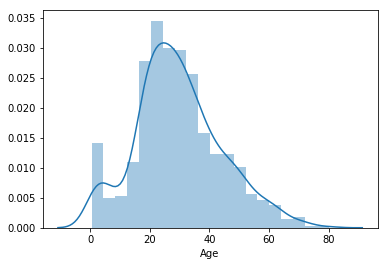

In [13]:
# See the overall distribution of Age
sns.distplot(titanic["Age"].dropna())

Check how many NA values there are in *Age* column.

In [14]:
titanic["Age"].isna().sum()

177

Assuming that *Name*, *Ticket*, *Fare*, *Cabin*, and *Embarked* are not related to the imputation of missing values in *Age*, these columns are disregrded at the first place.<br>
<br>
Now let's see the distribution for the other four columns - *Pclass*, *Sex*, *SibSp*, and *Parch* - to understand the dataset better.

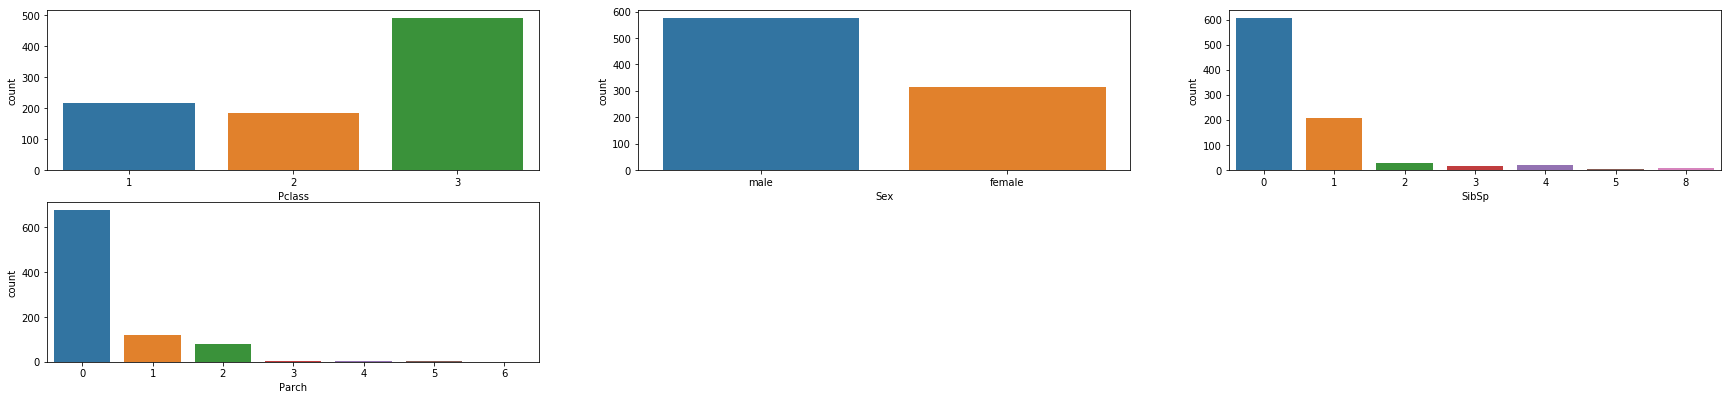

In [15]:
# Plot the distribution
categ = ["Pclass", "Sex", "SibSp", "Parch"]

fig = plt.figure(figsize=(30, 10))
for i in range(0, len(categ)):
    fig.add_subplot(3, 3, i + 1)
    sns.countplot(x=categ[i], data=titanic)

plt.show()

**Indiciation from the plots:** *SibSp* and *Parch* have too many 0 values. They are considered to be unhelpful for imputing missing values in *Age*.

<br>

Only *Survived*, *Pclass*, and *Sex* will be taken into consideration to impute missing age.

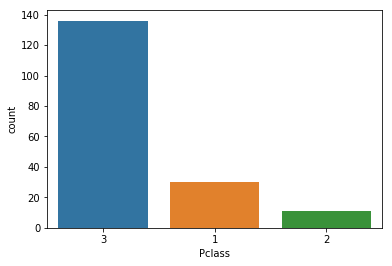

In [16]:
# Check which class has the most missing values in Age.
sns.countplot(
    x="Pclass",
    data=titanic[titanic["Age"].isna()],
    order=titanic[titanic["Age"].isna()]["Pclass"].value_counts().index,
)

Pclass 3 has the most missing values in Age.

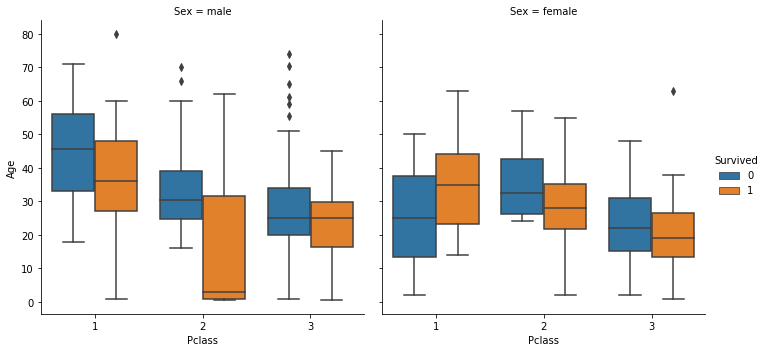

In [17]:
# Plot the boxplot of Age vs. Pclass by Survival, separating gender.
sns.catplot(
    x="Pclass", y="Age", hue="Survived", col="Sex", data=titanic, kind="box", dodge=True
)

### Decision of NA imputation:
Take median age of the combination of each *Pclass*, *Survived*, and *Sex* to fill in missing *Age*.

- Fill in missing *Age* for male.

In [18]:
# Pclass=3, Sex=male, Survived=0 
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 3)
    & (titanic.Sex == "male")
    & (titanic.Survived == 0),
    "Age",
] = titanic.Age[titanic.Pclass == 3][titanic.Sex == "male"][
    titanic.Survived == 0
].median()

# Pclass=3, Sex=male, Survived=1 
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 3)
    & (titanic.Sex == "male")
    & (titanic.Survived == 1),
    "Age",
] = titanic.Age[titanic.Pclass == 3][titanic.Sex == "male"][
    titanic.Survived == 1
].median()

# Pclass=2, Sex=male, Survived=0 
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 2)
    & (titanic.Sex == "male")
    & (titanic.Survived == 0),
    "Age",
] = titanic.Age[titanic.Pclass == 2][titanic.Sex == "male"][
    titanic.Survived == 0
].median()

# Pclass=2, Sex=male, Survived=1
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 2)
    & (titanic.Sex == "male")
    & (titanic.Survived == 1),
    "Age",
] = titanic.Age[titanic.Pclass == 2][titanic.Sex == "male"][
    titanic.Survived == 1
].median()

# Pclass=1, Sex=male, Survived=0
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 1)
    & (titanic.Sex == "male")
    & (titanic.Survived == 0),
    "Age",
] = titanic.Age[titanic.Pclass == 1][titanic.Sex == "male"][
    titanic.Survived == 0
].median()

# Pclass=1, Sex=male, Survived=1
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 1)
    & (titanic.Sex == "male")
    & (titanic.Survived == 1),
    "Age",
] = titanic.Age[titanic.Pclass == 1][titanic.Sex == "male"][
    titanic.Survived == 1
].median()

- Fill in missing *Age* for female.

In [19]:
# Pclass=3, Sex=female, Survived=0
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 3)
    & (titanic.Sex == "female")
    & (titanic.Survived == 0),
    "Age",
] = titanic.Age[titanic.Pclass == 3][titanic.Sex == "female"][
    titanic.Survived == 0
].median()

# Pclass=3, Sex=female, Survived=1
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 3)
    & (titanic.Sex == "female")
    & (titanic.Survived == 1),
    "Age",
] = titanic.Age[titanic.Pclass == 3][titanic.Sex == "female"][
    titanic.Survived == 1
].median()

# Pclass=2, Sex=female, Survived=0
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 2)
    & (titanic.Sex == "female")
    & (titanic.Survived == 0),
    "Age",
] = titanic.Age[titanic.Pclass == 2][titanic.Sex == "female"][
    titanic.Survived == 0
].median()

# Pclass=2, Sex=female, Survived=1
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 2)
    & (titanic.Sex == "female")
    & (titanic.Survived == 1),
    "Age",
] = titanic.Age[titanic.Pclass == 2][titanic.Sex == "female"][
    titanic.Survived == 1
].median()

# Pclass=1, Sex=female, Survived=0
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 1)
    & (titanic.Sex == "female")
    & (titanic.Survived == 0),
    "Age",
] = titanic.Age[titanic.Pclass == 1][titanic.Sex == "female"][
    titanic.Survived == 0
].median()

# Pclass=1, Sex=female, Survived=1
titanic.loc[
    (titanic.Age.isnull())
    & (titanic.Pclass == 1)
    & (titanic.Sex == "female")
    & (titanic.Survived == 1),
    "Age",
] = titanic.Age[titanic.Pclass == 1][titanic.Sex == "female"][
    titanic.Survived == 1
].median()

In [20]:
# Check if there is still NA in Age.
titanic["Age"].isna().sum()

0

There is no missing value in *Age* anymore.